# Fit polynomials 2
> Stay fit with polynomials and a tour through named matrices. Part 2.

In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.datasets import load_diabetes
import math
import scipy

## Introduction

This is the second part of 'Fit with polynomials'. Check out [the first part](https://vanderzwaan.dev/2022/02/05/Fit-polynomials-1.html) or read on about Lagrange polynomials and solving with derivatives. For this post we assume we know the underlying function $f(x)$ and no longer content with just samples.

### Example inputs

We can either be given some points $p_1,...,p_n$ or be given a function $f()$ that we want to approximate. I use these interchangably, because a function is convenient as ground truth and to  approximate a function we will be sampling from that function.

To make it concrete lets use some functions and sample 5 points $x_1,...,x_5$ from $[-1, +1]$.

In [2]:
d = np.linspace(-1, 1, 101) # I pick an odd number since linspace then also includes 0 (the middle value)
x = np.linspace(-1, 1, 5)

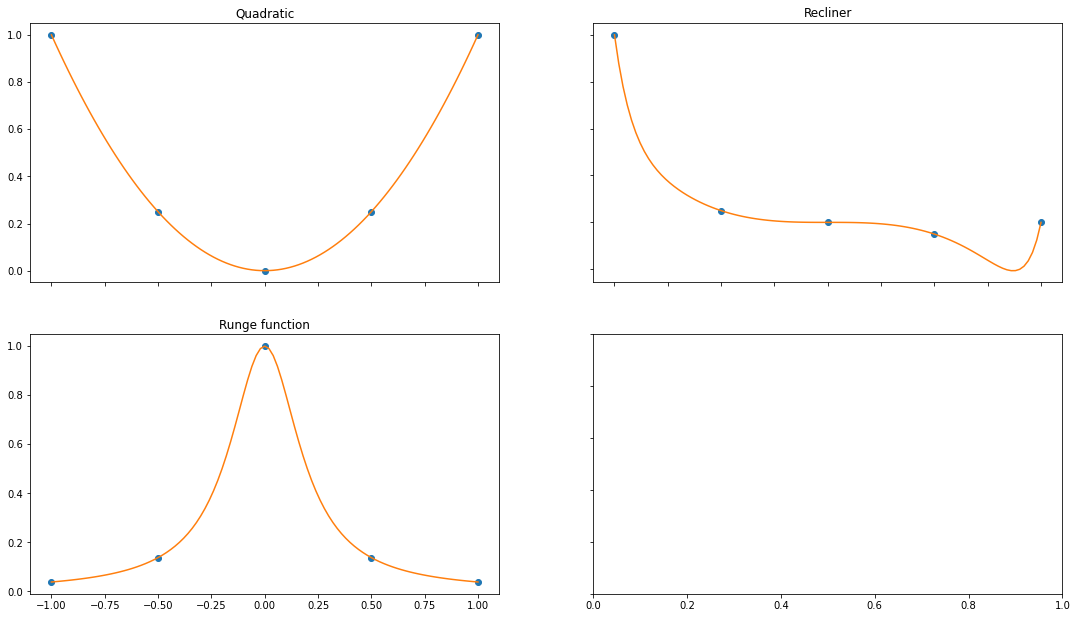

In [3]:
#collapse
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

f = lambda x: x**2
axs[0, 0].plot(x, f(x), 'o')
axs[0, 0].plot(d, f(d), '-')
axs[0, 0].set_title('Quadratic')

g = lambda x: 1/(1+(5*x)**2)
axs[1, 0].plot(x, g(x), 'o')
axs[1, 0].plot(d, g(d), '-')
axs[1, 0].set_title('Runge function')

h = lambda x: x**14-x**3
axs[0, 1].plot(x, h(x), 'o')
axs[0, 1].plot(d, h(d), '-')
axs[0, 1].set_title('Recliner')


for ax in axs.flat:
    ax.label_outer()

# Legendre instead of Vandermonde

The choice of de Vandermonde matrix seems natural as this is the natural way we denote polynomial $p(x) = c_0 \cdot x^0 + c_1 \cdot x^1 ... c_n \cdot x^n$. In the previous post we phrased the interpolation (or approximation) as finding the coefficients $c$. 

Another way to look at it was to say that we interpolate points with a _linear combination_ of polynomials $p_1(x)=x^0, ..., p_n(x)=x^n$. It is mere semantics but phrasing it this way helps to understand Legendre polynomials. Instead of using the monomials we get a different set of polynomials. ([Wikipedia on Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials)). 

This set of polynomials should have the property that any polynomial of degree $\leq n$ can be represented as a linear combination of polynomials from this set. We say that the polynomials are a _basis_. Secondly, the set shouldn't be too large.

The set of Legendre polynomials is a basis for the interval $[-1, 1]$ and the set of degree $n$ is _orthogonal_ and contains exactly $n+1$ polynomials, the same as for the monomials. Orthogonal means that no Legendre polynomial is a linear combination of multiple other Legendre polynomials: we need them all.



## Definition
Since this post is only about Legendre polynomials we denote $P_n(x)$ as the Legendre polynomial of degree $n$, and $P_0,...,P_n$ form a basis for degree $n$ polynomials. This means we can represent any polynomial with a linear combination of Legendre polynomials, specifically any polynonomial of degree $n$ as a linear combination of Legendre polynomials $P_0,...P_n$.



An additional property is that the following is true:

$$ \int_{-1}^1 P_m(x)P_n(x) d x = 0, \textrm{ if $n\neq m$ } $$ 

## Definition 2 (As definition 1 us exceedingly unhelpful?)
Wow. The above probably did not help at all. We should construct these polynomials exactly and give examples. Hold on to your jacket, we're about to give complicated formulaes.

The easiest is probably derived from the Rodrigues' formula:

$$P_n(x) = \sum_{k=0}^n  \binom{n}{k} \binom{n+k}{k} \left( \frac{x-1}{2} \right)^k$$

Ok. Let's just start plotting these things :)

## Implementing Legendre polynomials

First we define the function naively:

In [4]:
def legendre_naive(n):
    def _legendre(x):
        total = 0
        for k in range(n+1):
            total +=  math.comb(n, k) * math.comb(n+k, n) * ((x-1)/2)**k
        return total
    return _legendre

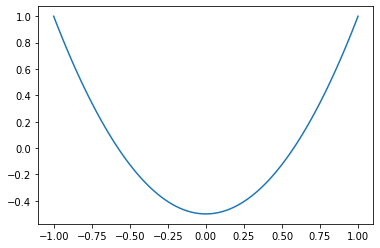

In [5]:
#collapse
fig, ax =  plt.subplots()

leg2 = legendre_naive(2)
y = [leg2(xi) for xi in d]

series = plt.plot(d, y)

We should have a nicer function where we can pass in an array. So lets try again with some slicing trickery:

In [6]:
def legendre(n):
    def _legendre(x):
        # Create a (1, k)-array
        k = np.arange(n+1)[None, :]
        
        # Turn x into a (|x|, 1)-array. The result is a (|x|, k)-array, and sum over the second axis (the k)
        parts = scipy.special.comb(n, k) * scipy.special.comb(n+k, n) * ((x[:, None]-1)/2)**k
        
        return np.sum(parts, axis=1)
    return _legendre

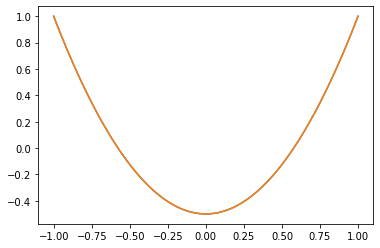

In [7]:
#collapse
fig, ax =  plt.subplots()

leg2 = legendre_naive(2)
y = [leg2(xi) for xi in d]

series = plt.plot(d, y)
series = plt.plot(d, legendre(2)(d))

## Visualize: squiggly vs boring

Now we plot the Legendre polynomials and their monomial counterpart. Tl;dr is that Legendre polynomials are squiggly.

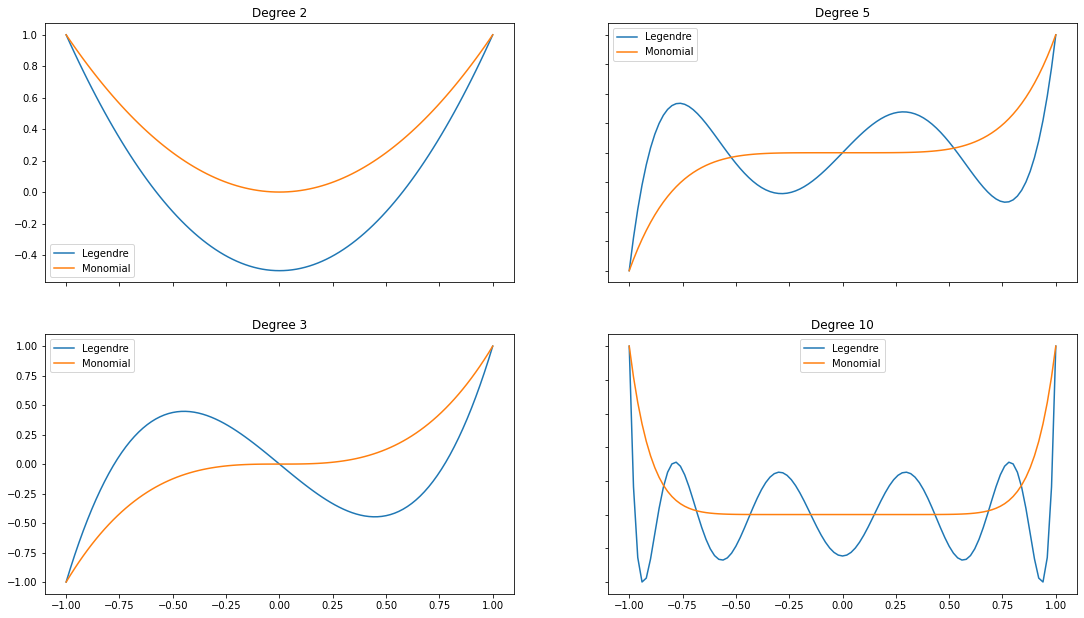

In [37]:
#collapse
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)


axs[0, 0].plot(d, legendre(2)(d), '-', label="Legendre")
axs[0, 0].plot(d, d**2, '-', label="Monomial")
axs[0, 0].set_title('Degree 2')
axs[0, 0].legend()

axs[1, 0].plot(d, legendre(3)(d), '-', label="Legendre")
axs[1, 0].plot(d, d**3, '-', label="Monomial")
axs[1, 0].set_title('Degree 3')
axs[1, 0].legend()

axs[0, 1].plot(d, legendre(5)(d), '-', label="Legendre")
axs[0, 1].plot(d, d**5, '-', label="Monomial")
axs[0, 1].set_title('Degree 5')
axs[0, 1].legend()

axs[1, 1].plot(d, legendre(10)(d), '-', label="Legendre")
axs[1, 1].plot(d, d**10, '-', label="Monomial")
axs[1, 1].set_title('Degree 10')
axs[1, 1].legend()

for ax in axs.flat:
    ax.label_outer()


# Solving

## Again, matrices
In the previous post we found the coefficients by first representing the Vandermonde polynomial as a matrix $L(x)$ and then solving $L(x)c=f(x)$.

To solve the interpolation of points $x$ we used the Vandermonde matrix. For the function $f(x) = x^2$ the coefficients are $c_0=0, c_1=0, c_2=1$ as $x^2=0 \cdot x^0 + 0 \cdot x^1 + 1 \cdot x^2$. This means that if we do $V_2(x) \cdot c$ we should get $f(x)$ (where $V$ is the Vandermonde matrix). Let's do this:

In [8]:
V = np.vander(x, N=3, increasing=True)
c = np.array([0., 0., 1.])
np.dot(V, c)

array([1.  , 0.25, 0.  , 0.25, 1.  ])

So far so good. NumPy has similar functionality for Legendre polynomials. The first three Legendre polynomials are $P_0(x) = 1$, $P_1(x) = x$ and $P_2(x) = (3x^2-1)/2$.

We expect the coefficients to be $$c_0=\frac{1}{3}, c_1=0, c_2=\frac{2}{3}$$ as $$\frac{1}{3} \cdot 1 + 0 \cdot x + \frac{2}{3} \cdot \left( \frac{1}{2}(3x^2-1)\right) = \frac{1}{3} + x^2 - \frac{1}{3} = x^2 $$

In [9]:
L = np.polynomial.legendre.legvander(x, 2)
c = np.array([1/3, 0, 2/3])
np.dot(L, c)

array([1.  , 0.25, 0.  , 0.25, 1.  ])

We can verify this with solving it directly:

In [10]:
np.linalg.lstsq(L, f(x), rcond=None)[0]

array([0.33333333, 0.        , 0.66666667])

Great!

## Wait, what? So, how did this help?
You might be wondering how this has helped us. Instead of an intuive description of polynomials by monomials (Vandermonde matrix) some integrals and weird Legendre polynomials were forced on you.

Up to this point it actually didn't help. Much. We can hope that the Legendre matrix is more stable than Vandermonde*, but that is not the crux. The real beauty will come when we look at derivates and something magical will happen.

*I think they're both unstable/high condition number, but don't know for sure.

## Derivatives to the rescue

Previously we solved the interpolation of a function $f()$ by:
    
1. Sampling some points $x$ and computing $f(x)$
2. Creating a Vandermonde or Legendre matrix $A$
3. (Approximately) solve $Ac=f(x)$ i.e. find a $c$ such that $||Ac-f(x)||_2$is minimized
4. Profit



We can rephrase the minimization with Legendre polynomials as:

$$ F(c) = \int_{-1}^1 \left( f(x) - \sum_{k=0}^n c_k L_k(x)\right)^2 dx$$

This function has a minimum (just believe this) and so the minimum is where the partial derivatives are zero.

$$ \frac{\partial F}{\partial c_k}=0 \textrm{ for } k=1,...n $$

For the exact interpolation we solved $Ac=f(x)$ which could be phrased in matrix notation. Guess what we're going to do.

## Bla bla system of equations with derivatives

As an example we take the five points $x$ and degree $2$, which means we have $c_0, c_1, c_2$ as variables. For 

$$r(c)=p(q(c))$$ the derivative is 
$$r'(c) = p'(q(c))q'(c)$$

Set
$$ q(c_0) = f(x) - \sum_{k=0}^n c_k L_k(x) =  f(x) - \sum_{k=1}^n c_k L_k(x) - c_0 L_0(x)$$ 
$$ p(x) = x^2 $$

The partial derivative of $q$ is then quite simple:

$$\frac{\partial q}{\partial c_0} = - L_0(x) $$

We then get
$$
\frac{\partial F}{\partial c_0} = 2 \int_{-1}^1 \left( f(x) - \sum_{k=0}^n c_k L_k(x) \right) \cdot -L_0(x) dx
$$

And in general we can state that
$$
\frac{\partial F}{\partial c_p} = -2 \int_{-1}^1 \left( f(x) - \sum_{k=0}^n c_k L_k(x) \right) \cdot L_p(x) dx
$$


Setting these to zero we get a system of equations:

$$
\begin{aligned}
c_0 \int_{-1}^1 L_0(x) \cdot L_0(x) dx &+ c_1 \int_{-1}^1 L_0(x) \cdot L_1(x) dx  &+ c_2 \int_{-1}^1 L_0(x) \cdot L_2(x) dx &= \int_{-1}^1 L_0(x) f(x) dx \\
c_0 \int_{-1}^1 L_1(x) \cdot L_0(x) dx &+ c_1 \int_{-1}^1 L_1(x) \cdot L_1(x) dx  &+ c_2 \int_{-1}^1 L_1(x) \cdot L_2(x) dx &= \int_{-1}^1 L_1(x) f(x) dx \\
c_0 \int_{-1}^1 L_1(x) \cdot L_0(x) dx &+ c_1 \int_{-1}^1 L_2(x) \cdot L_1(x) dx  &+ c_2 \int_{-1}^1 L_2(x) \cdot L_2(x) dx &= \int_{-1}^1 L_2(x) f(x) dx \\
\end{aligned}
$$

## Hitting pay dirt
(Yes I quoted 'Gold Rush')

Remember the seemingly useless statement about orthogonality? This is where the beautiful part starts! Legendre polynomials are orthogonal and this is equivalent to:

$$ \int_{-1}^1 P_m(x)P_n(x) d x = 0, \textrm{ if $n\neq m$ } $$ 

If we look at the system of equations above we see that all entries except the diagonal are _orthogonal_ and we have a diagonal matrix!

\begin{align}
c_0 \int_{-1}^1 L_0(x) \cdot L_0(x) dx & &&= \int_{-1}^1 L_0(x) f(x) dx \\
& c_1 \int_{-1}^1 L_1(x) \cdot L_1(x) dx  &&= \int_{-1}^1 L_1(x) f(x) dx \\
& & c_2 \int_{-1}^1 L_2(x) \cdot L_2(x) dx &= \int_{-1}^1 L_2(x) f(x) dx \\
\end{align}

Let us denote this matrix as $G$ and the right-hand-side as $y(x)$, which means that to solve the equation $Gc=y(x)$ the matrix $G$ _is it's own inverse_! We can simply compute $Gy(x)$ to solve for $c$. 

Even better, because $G$ is diagonal we can simply solve $c_i = y(x_k) / G(x)_k$ for each $k$ in just a few operations. **But wait, there is more!** Turns out that $G(x)_k = \frac{2}{2k+1}$. so we only need to solve

$$ c_k = y(x_k) / \frac{2}{2k+1} $$

In [11]:
def G(n):
    return np.array([2/(2 * k + 1) for k in range(n+1)])

### Deriving $G_k = \frac{2}{2k+1}$

For the interested people. The recursive defintion of $P_k$ is (dropping $x$ for brevity):

$$  P_k = ((2k-1)x P_{k-1}(x) - (k-1) P_{k-2}(x))/k $$


with $$ P_1 = x $$

The idea is that we substitute and use orthogonality:


\begin{align}
F_k = \int_{-1}^1 P_k \cdot P_k dx &= k^{-1} \int_{-1}^1 ((2k-1) x \cdot P_{k-1} \cdot P_{k}) - (k-1) \cdot P_{k-2} \cdot P_{k} dx \\
&= \frac{2k-1}{k} \int_{-1}^1 x \cdot P_{k-1} \cdot P_{k} dx - \frac{k-1}{k} \cdot \int_{-1}^1 P_{k-2} \cdot P_{k} dx \\
&= \frac{2k-1}{k} \int_{-1}^1  x \cdot P_{k-1} \cdot P_{k} dx \\
\end{align}

because $P_k \cdot P_q = 0$ for $k\neq q$.



During rewriting I didn't quickly see how to continue. I was trying to find a recursive definition $F_k = \textrm{something} \cdot F_{k-1}$ and didn't think to substitute $P_k$ with _a higher_ $P_{k+1}$. On [MathExchange](https://math.stackexchange.com/questions/2499216/legendre-polynomial-orthogonality-integral) there was the idea to substitute 

$$x P_{k} = \left( (k+1)P_{k+1} + k P_{k-1} \right) / (2k+1)$$

In hindsight this makes sense as we are continuously using the orthogonality to cancel out products of $P$. Using this idea we obtain:


\begin{align}
F_k  &= \frac{2k-1}{k} \int_{-1}^1  x \cdot P_{k} \cdot P_{k-1} dx \\
&= \frac{2k-1}{k} \int_{-1}^1  P_{k-1} \cdot \left( (k+1)P_{k+1} + k P_{k-1} \right) / (2k+1) dx \\
&= \frac{2k-1}{k} \cdot \frac{k+1}{2k+1} \int_{-1}^1   P_{k-1} \cdot P_{k+1} dx +  \frac{2k-1}{2k+1}\int_{-1}^1P_{k-1}^2 dx) \\
&= \frac{2k-1}{2k+1} F_{k-1} \\
&= \frac{2k-1}{2k+1} \cdot \frac{2k-3}{2k-1} F_{k-2} \\
&= \frac{1}{2k+1} F_{0} \\
&= \frac{2}{2k+1}
\end{align}

because
$$F_{0} = \int_{-1}^1 P_0(x)^2 dx = \int_{-1}^1 1 dx = 2$$

### Computing the right hand side $y(x)$

Remaining is computing the integral over the function $f$ and Legendre polynomials. Deriving a closed form is too much effort, we will simply approximate the integral as it is basically a sum.

Assuming evenly spaced points $x$ the integral can be approximated as the sum $f(x)$ divided by $|x|$ times $2$ (the size of the interval $[-1, 1]$).

In [12]:
def y_approx(f, d, precision=101):
    x = np.linspace(-1, 1, precision)
    
    legendres= [legendre(k) for k in range(d+1)]
    def lv(x):
        return np.stack([leg(x) for leg in legendres])
    
    return np.sum(f(x) * lv(x), axis=1)/precision*2

Alternatively we can use the trapezoidal rule and use a NumPy function:

In [52]:
def y(f, d, precision=101):
    x = np.linspace(-1, 1, precision)
    
    legendres= [legendre(k) for k in range(d+1)]
    def lv(x):
        return np.stack([leg(x) for leg in legendres])
    
    return np.trapz(f(x) * lv(x), dx=2/precision, axis=1)

Checking the results we see that the approximation with trapezoidal rule is pretty good!

Define a degree 2 Legendre polynomial

In [53]:
L = np.polynomial.legendre.legvander(x, 2)

Check the results with function $f(x)=x^2$:

In [54]:
c1 = y_approx(f, 2)/G(2)
np.dot(L, c1)

array([ 1.050396 ,  0.2512005, -0.015198 ,  0.2512005,  1.050396 ])

In [55]:
c2 = y(f, 2)/G(2)
np.dot(L, c2)

array([ 9.90990059e-01,  2.47487629e-01, -3.46514851e-04,  2.47487629e-01,
        9.90990059e-01])

Recall that we found the solution `c3` by hand:

In [56]:
c3 = np.array([1/3, 0, 2/3])
np.dot(L, c3)

array([1.  , 0.25, 0.  , 0.25, 1.  ])

# Summary

Hope you appreciated the beautiful way how fitting a polynomial through Legendre polynomials turned out to require hard calculations. The coefficients can be found with a simple formula, which only requires to evaluate an integral ($y(x_k)$), which can be done numerically:

$$ c_k = y(x_k) / \frac{2}{2k+1} $$

For the visualize included feast your eyes:

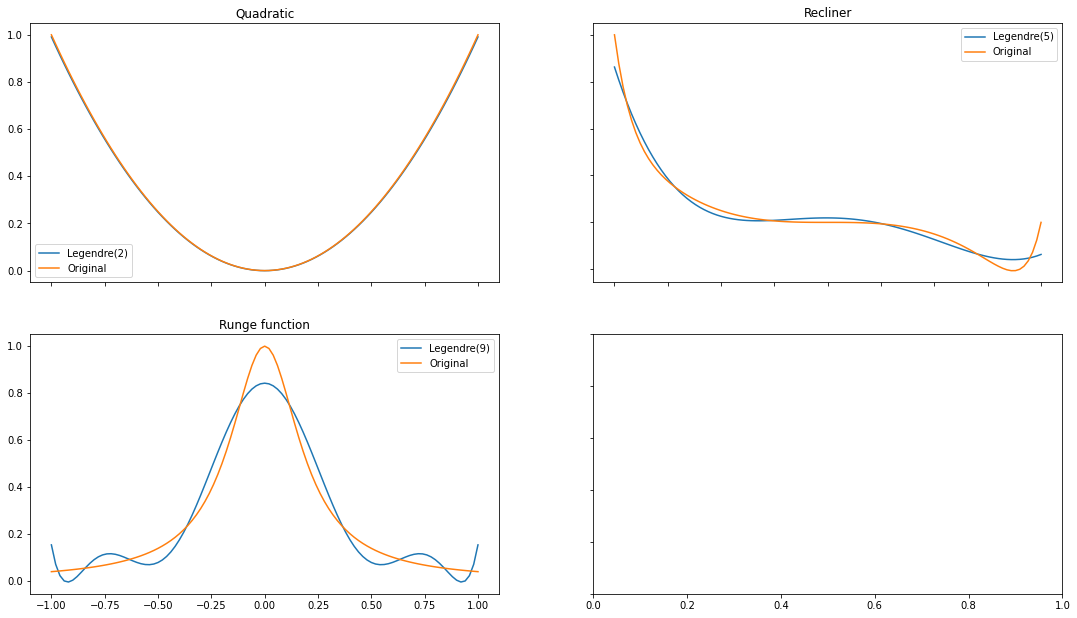

In [73]:
#collapse
d = np.linspace(-1, 1, 101) # I pick an odd number since linspace then also includes 0 (the middle value)
x = np.linspace(-1, 1, 5)


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

f = lambda x: x**2
c_f = y(f, 2)/G(2)
L_f = np.polynomial.legendre.Legendre(c_f, [-1, 1])

axs[0, 0].plot(d, L_f(d), '-', label="Legendre(2)")
axs[0, 0].plot(d, f(d), '-', label="Original")
axs[0, 0].set_title('Quadratic')
axs[0, 0].legend()
               
g = lambda x: 1/(1+(5*x)**2)
c_g = y(g, 9)/G(9)
L_g = np.polynomial.legendre.Legendre(c_g, [-1, 1])

axs[1, 0].plot(d, L_g(d), '-', label="Legendre(9)")
axs[1, 0].plot(d, g(d), '-', label="Original")
axs[1, 0].set_title('Runge function')
axs[1, 0].legend()
               
h = lambda x: x**14-x**3
c_h = y(h, 5)/G(5)
L_h = np.polynomial.legendre.Legendre(c_h, [-1, 1])

axs[0, 1].plot(d, L_h(d), '-', label="Legendre(5)")
axs[0, 1].plot(d, h(d), '-', label="Original")
axs[0, 1].set_title('Recliner')
axs[0, 1].legend()

for ax in axs.flat:
    ax.label_outer()

## References

1. https://math.stackexchange.com/questions/200924/why-is-lagrange-interpolation-numerically-unstable
2. http://www.math.pitt.edu/~sussmanm/2070/lab_09/index.html
3. https://www.math.usm.edu/lambers/mat772/fall10/lecture5.pdf
4.  https://en.wikipedia.org/wiki/Runge%27s_phenomenon
5.  https://en.wikipedia.org/wiki/Legendre_polynomials
6.  https://en.wikipedia.org/wiki/Lagrange_polynomial
7.  https://epubs.siam.org/doi/pdf/10.1137/S0036144502417715

What if domain is fixed $[-1, 1]$ we can sample from a function that you wish to approximate? Then don't take equidistant points but Chebyyshev points.